## **IMPORTS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.datasets import mnist


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(X_train.shape,X_test.shape)
print(y_test.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(10000,) (10000,)


## **VISUALIZATION**

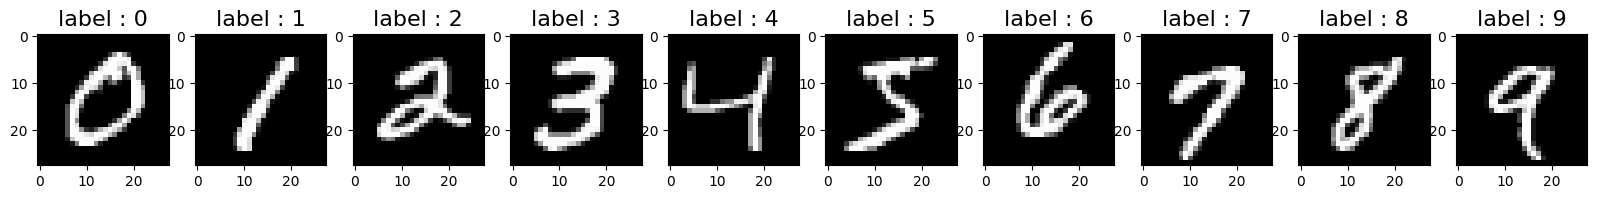

In [7]:
num_classes=10
f,axis=plt.subplots(1,num_classes,figsize=(20,6))
for i in range(0,num_classes):
    axis[i].imshow(X_train[y_train==i][0],cmap='grey')
    axis[i].set_title("label : {}".format(i),fontsize=16)


In [12]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [13]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## **DATA PREPARATION**

In [15]:
X_train=X_train/255.0
X_test=X_test/255.0
X_train=X_train.reshape(-1,784)
X_test=X_test.reshape(-1,784)
print(X_train.shape,X_test.shape)

(60000, 784) (10000, 784)


In [17]:
model=Sequential([
    Dense(512,activation='relu',input_shape=(784,)),
    Dense(512,activation='relu'),
    Dropout(0.25),
    Dense(10,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
batch_size=512
epochs=10
model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,y_test))


Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9723 - loss: 0.0969 - val_accuracy: 0.9684 - val_loss: 0.1012
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9743 - loss: 0.0899 - val_accuracy: 0.9692 - val_loss: 0.1000
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9746 - loss: 0.0857 - val_accuracy: 0.9695 - val_loss: 0.0975
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9754 - loss: 0.0828 - val_accuracy: 0.9706 - val_loss: 0.0973
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9766 - loss: 0.0793 - val_accuracy: 0.9718 - val_loss: 0.0930
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9766 - loss: 0.0766 - val_accuracy: 0.9708 - val_loss: 0.0915
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9787 - loss: 0.0720 - val_accuracy: 0.9725 - val_loss: 0.0891
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9790 - loss: 0.0704 - val_accu

In [20]:
test_loss, test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print('Test Loss:',test_loss)
print('Test Accuracy:',test_accuracy)

Test Loss: 0.08536867052316666
Test Accuracy: 0.9746999740600586


In [21]:
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred_classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[4.7138485e-07 8.4649599e-08 6.2987914e-05 ... 9.9942672e-01
  1.1350710e-06 6.2710824e-05]
 [1.1883143e-06 1.3485665e-03 9.9767387e-01 ... 2.5667832e-08
  3.9753149e-06 3.0514517e-12]
 [1.7010259e-06 9.9389786e-01 1.3728994e-03 ... 2.9426827e-03
  8.1704475e-04 2.2166834e-05]
 ...
 [9.8463460e-10 3.1256086e-08 1.0594544e-08 ... 4.6366225e-05
  1.4484721e-05 4.7682051e-04]
 [1.1792935e-07 1.5287785e-06 2.6880967e-10 ... 3.1732569e-08
  1.3159479e-04 5.5171500e-07]
 [3.7668897e-06 4.2678612e-09 5.3299477e-06 ... 3.2912135e-11
  5.8527104e-07 3.6218861e-09]]
[7 2 1 ... 4 5 6]


True Label: 1
Predicted Label: 1


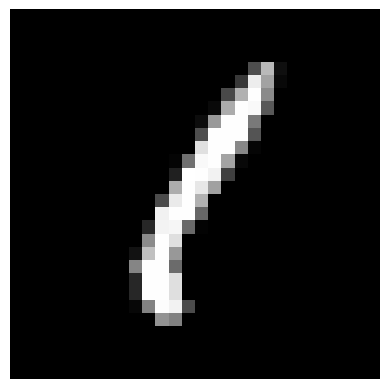

In [23]:
random_idx=np.random.choice(len(X_test))
image=X_test[random_idx]
true_label=np.argmax(y_test[random_idx])
predicted_label=y_pred_classes[random_idx]
print("True Label:",true_label)
print("Predicted Label:",predicted_label)
plt.imshow(image.reshape(28,28),cmap='gray')
plt.axis('off')
plt.show()

## **CONFUSION MATRIX**

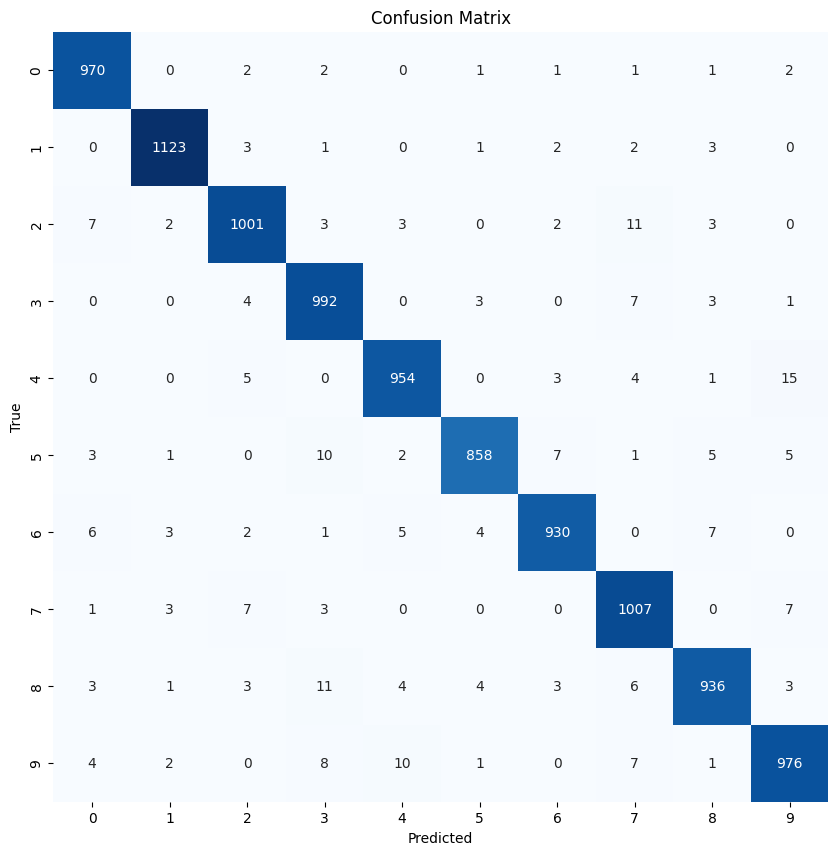

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

matrix=confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))
fig, axis=plt.subplots(figsize=(10,10))
sns.heatmap(matrix,annot=True,fmt='d',cmap='Blues',cbar=False,xticklabels=range(10),yticklabels=range(10))
axis.set_xlabel('Predicted')
axis.set_ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## **ERRORS EVALUATION**

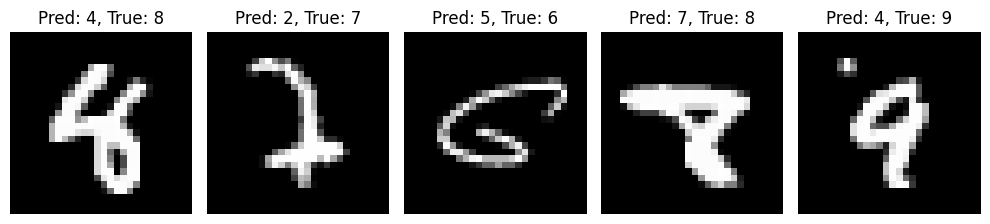

In [29]:
errors = (y_pred.argmax(axis=1) != y_test.argmax(axis=1))
y_pred_errors = y_pred[errors]
y_pred_errors_classes = np.argmax(y_pred_errors, axis=1)
y_test_errors = y_test[errors]
X_test_errors = X_test[errors]
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = y_pred_errors[np.arange(len(y_pred_errors)), y_test_errors.argmax(axis=1)]
difference_errors = y_pred_errors_probability - true_probability_errors
sorted_idx = np.argsort(difference_errors)
top_idx = sorted_idx[-5:]
plt.figure(figsize=(10, 10))
for i, idx in enumerate(top_idx):
    ax = plt.subplot(2, 5, i + 1)
    ax.imshow(X_test_errors[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {y_pred_errors_classes[idx]}, True: {y_test_errors.argmax(axis=1)[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()